In [8]:
import numpy as np
import matplotlib.pylab as plt

# Základní operace s časovou řadou

V tomto příkladu použijeme časovou řadu popisující měsíční počet narozených dětí v New Yorku od ledna 1946 do prosince 1959. Tato řada je uložena v souboru 'nybirths.dat'.

**Úkol 1: načtěte do proměnné `data` soubor nybirths.dat jako numpy array a vytiskněte prvních 20 hodnot.**

In [3]:
fn = 'nybirths.dat'
data = np.loadtxt(fn)
data[:20]

array([26.663, 23.598, 26.931, 24.74 , 25.806, 24.364, 24.477, 23.901,
       23.175, 23.227, 21.672, 21.87 , 21.439, 21.089, 23.709, 21.669,
       21.752, 20.761, 23.479, 23.824])

**Úkol 2: zjistěte, kolik hodnot je v řadě uloženo.**

In [4]:
data.shape

(168,)

**Úkol 3: vykreslete průběh časové řady a diskutujte její pravděpodobné vlastnosti.**

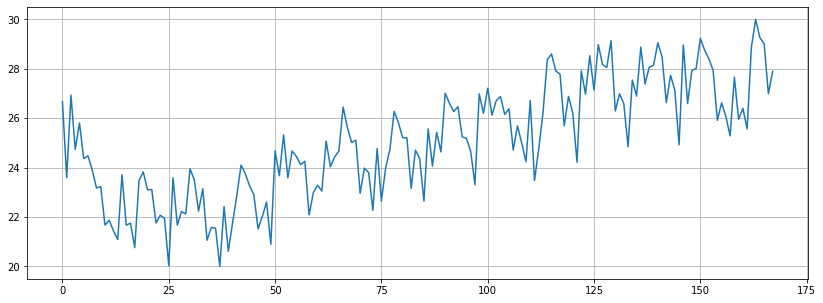

In [5]:
plt.figure(figsize=(14,5))
plt.plot(data)
plt.show()

**Úkol 4: rozložte časovou řadu na trend a další složky. Rozhodněte, který model - zda multiplikativní či aditivní - lépe odpovídá.**

/home/jp/anaconda3/envs/fit/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:665: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Suma kvadrátů reziduí ACF: 1.4236733154190766


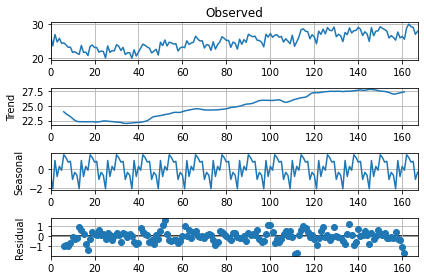

In [7]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf

result = seasonal_decompose(data, period=12, model='additive')
resid_acf = acf(result.resid, nlags=10, missing='drop')
sum_of_squares_resid_acf = np.sum(resid_acf**2)
print('Suma kvadrátů reziduí ACF:', sum_of_squares_resid_acf)

result.plot()
plt.show()

**Úkol 5: Odstraňte trend z časové řady a vykreslete výsledek.**

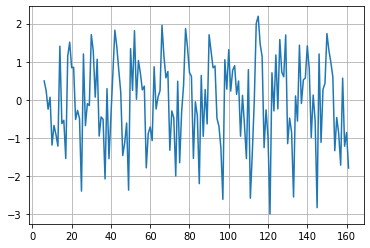

In [6]:
detrended = data - result.trend
plt.plot(detrended)